# Homework 6


This homework is designed to process a large csv file (bigger than pandas can handle)
https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true

Write code to perform/answer the following actions:

1. Print how many records processed
1. Create a histogram of ages
1. List the top 20 occupations 

Don't use Pandas or Dask

In [2]:
!python --version

Python 3.9.7


### Downloading zip file

In [3]:
url= 'https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true'

In [4]:
from urllib import request

In [5]:
def download(file_name, url):
    catch = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(catch.read())

In [7]:
download('bigdata.zip',url)

In [8]:
!ls

bigdata.zip hw-06.ipynb


### Unizipping the file

In [14]:
from zipfile import ZipFile

In [21]:
def unzip(filename, path='./'):
    with ZipFile(filename, 'r') as zip:
        zip.printdir()
        print('Extracting your file...')
        zip.extractall(path=path)
        print('Extraction Complete.')

In [22]:
unzip('bigdata.zip')

File Name                                             Modified             Size
bigfile.csv                                    2022-03-07 20:08:48  18034182194
Extracting your file...
Extraction Complete.


### Detecting the encoding

In [30]:
import chardet

In [31]:
with open('bigfile.csv', 'rb') as file:
    content=file.read()
    description = chardet.detect(content)
    print(description)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


### Reading CSV File

In [59]:
age=[]
occupation=[]
records_processed=0

In [60]:
with open('bigfile.csv', encoding='ascii') as file:
    while(True):
        line = file.readline().rstrip()
#         print(line)
        if not line:
            break
            
        strip=line.strip('0')
        row=strip.split(',')
        age.append(row[3])
        occupation.append(row[4])
        records_processed+=1
          

### Records processed

In [63]:
print('Records Processed are : ', records_processed)

Records Processed are :  600000


### Histogram - Ages

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Getting int values of age

In [148]:
store_age=[]
for i in age:
    store_age.append(int(i))
#max(age)        

#### Plot without cleaning ages above 100

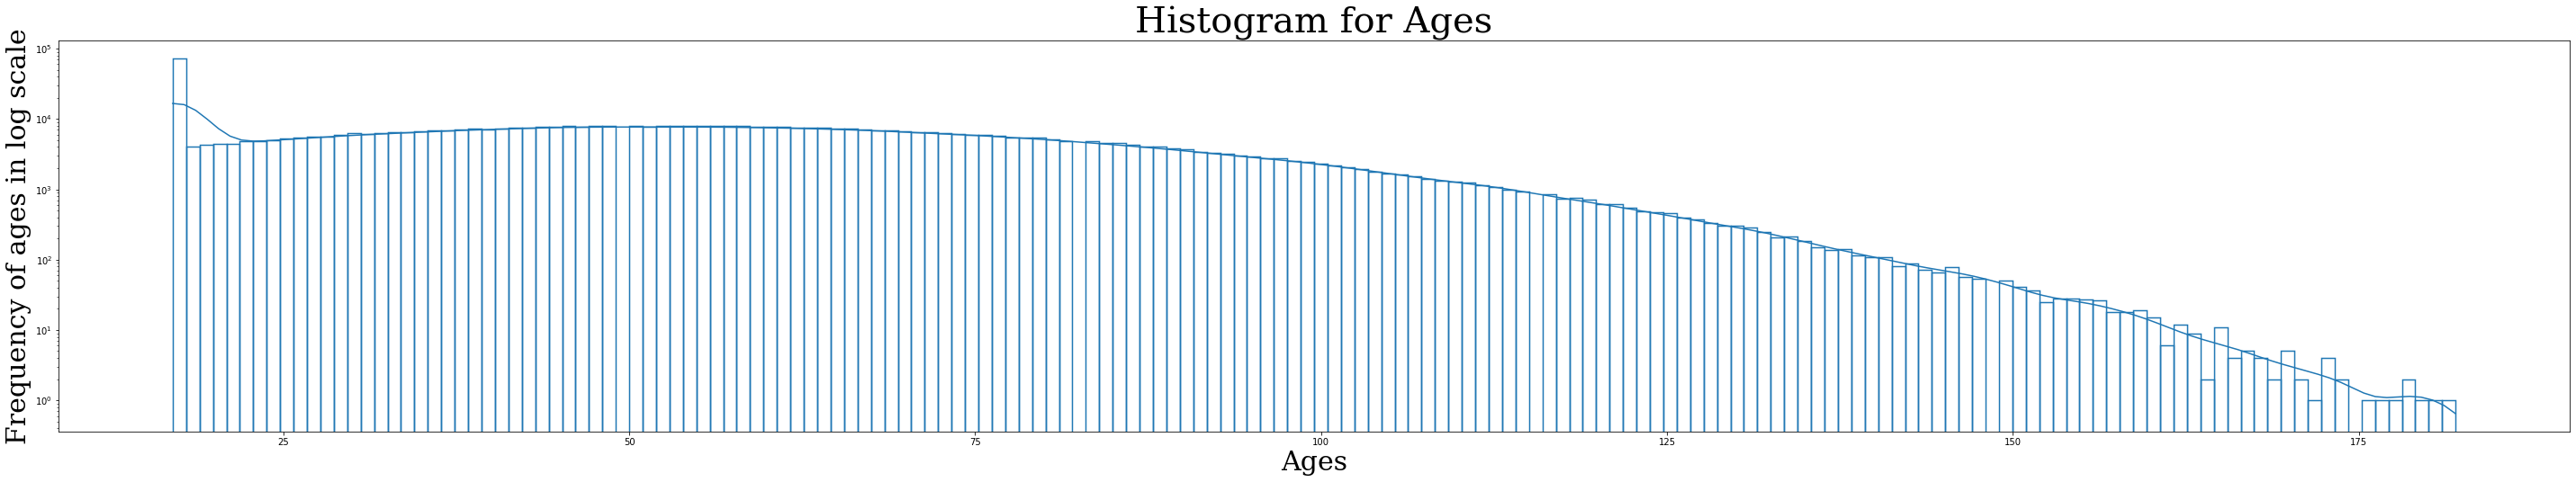

In [143]:
plt.figure(figsize=(50,8))
plot=sns.histplot(x=store_age, kde=True, fill=False)
plt.yscale('log')
plt.xlabel('Ages',fontdict={'size':30,'family':'serif'})
plt.ylabel('Frequency of ages in log scale',fontdict={'size':30,'family':'serif'})
plt.title('Histogram for Ages', fontdict={'size':40,'family':'serif'})
plt.show()

#### Plot with cleaning the ages above 100

In [144]:
copy_age = store_age
cleaned_age=[]
for i in copy_age:
    if i<101:
        cleaned_age.append(i)
    else: continue

In [145]:
max(cleaned_age)

100

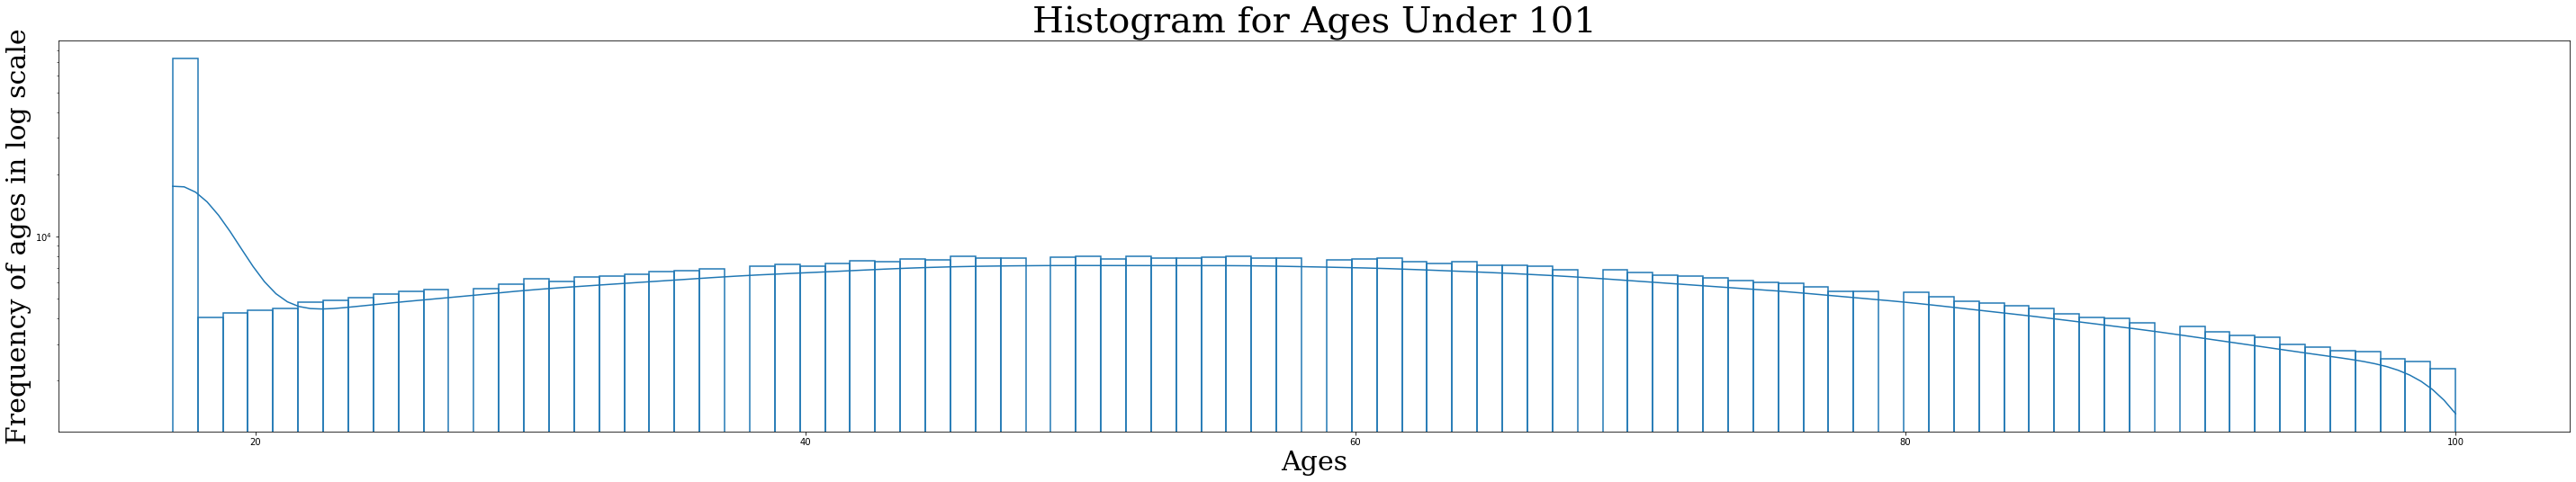

In [147]:
plt.figure(figsize=(50,8))
plot=sns.histplot(x=cleaned_age, kde=True, fill=False)
plt.yscale('log')
plt.xlabel('Ages',fontdict={'size':30,'family':'serif'})
plt.ylabel('Frequency of ages in log scale',fontdict={'size':30,'family':'serif'})
plt.title('Histogram for Ages Under 101', fontdict={'size':40,'family':'serif'})
plt.show()

### Top 20 occupation

In [136]:
from collections import Counter
occupation_counts = Counter(occupation)
sorted(occupation_counts.items(), key = lambda value: value[1], reverse=True)[0:20]


[('Scientist- product/process development', 1064),
 ('Psychiatric nurse', 1037),
 ('Therapist- sports', 1030),
 ('Toxicologist', 1024),
 ('Social researcher', 1021),
 ('Environmental health practitioner', 1020),
 ('Naval architect', 1019),
 ('Teacher- primary school', 1018),
 ('Administrator- charities/voluntary organisations', 1018),
 ('Chartered loss adjuster', 1012),
 ('Photographer', 1008),
 ('Field trials officer', 1008),
 ('Radio producer', 1006),
 ('Ranger/warden', 1004),
 ('Electrical engineer', 1004),
 ('Radiographer- diagnostic', 1004),
 ('Acupuncturist', 1003),
 ('Administrator- education', 1003),
 ('Quantity surveyor', 1002),
 ('Research scientist (medical)', 1001)]

References:
1. https://www.codegrepper.com/code-examples/python/value_counts+list+python
2. https://towardsdatascience.com/sorting-a-dictionary-in-python-4280451e1637